K-means clustering is an unsupervised learning algorithm which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest centroid. The algorithm aims to minimize the squared euclidian distances between the observation and the centroid of cluster to which it belongs.

In this algorithm, the data points are assigned to a cluster in such a manner that the sum of the squared distance between the data points and centroid would be minimum. It is to be understood that less variation within the clusters will lead to more similar data points within same cluster.

In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import numpy as np
from numpy.random import seed
seed(42)
import pandas as pd
import os
import datetime
from datetime import datetime, date
import sys
import json
import requests 
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine
import time 



import sklearn
from sklearn.svm import SVC
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler
import sklearn.datasets
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# data, _ = make_blobs(n_samples=300, centers=4,cluster_std=0.60, random_state=0)


## Read Data from the backend , Used Postgres

In [2]:
db_connection_string = "postgres:jaigurudev@localhost:5432/FinalProject"
engine = create_engine(f'postgresql://{db_connection_string}')

In [3]:
engine.table_names()

['bikes_nondups', 'bikes']

In [4]:
pd.read_sql_query('select * from bikes', con=engine)

,station_id,bikes_available,bikes_disabled,docks_available,docks_disabled,time_reported
0,72,20,0,35,0,2020-08-04 23:13:12
1,79,23,1,9,0,2020-08-04 23:13:25
2,82,22,3,2,0,2020-08-04 22:32:07
3,83,44,0,18,0,2020-08-04 23:47:05
4,116,23,0,27,0,2020-08-04 22:54:06
...,...,...,...,...,...,...
455429,4079,0,0,0,0,1970-01-01 17:00:00
455430,4082,0,0,0,0,1970-01-01 17:00:00
455431,4104,0,0,0,0,1970-01-01 17:00:00
455432,4106,0,0,0,0,1970-01-01 17:00:00


In [5]:
# Read the csv file into a pandas DataFrame
lsd = pd.read_sql_query('select * from bikes_nondups', con=engine).head(100)
lsd

,station_id,bikes_available,bikes_disabled,docks_available,docks_disabled,time_reported
0,3456,11,0,11,0,2020-08-07 16:29:04
1,3733,7,1,38,0,2020-08-05 16:18:06
2,3123,24,0,3,0,2020-08-05 08:58:35
3,3525,17,1,3,0,2020-08-06 10:41:06
4,3318,9,3,27,0,2020-08-05 08:39:41
...,...,...,...,...,...,...
95,262,0,0,24,0,2020-08-07 13:01:49
96,319,1,1,31,0,2020-08-06 19:12:33
97,3772,7,0,12,0,2020-08-06 09:06:06
98,531,20,1,18,0,2020-08-07 00:06:58


In [6]:
#convert datetime to integer
lsd['date_n_time'] = pd.to_datetime(lsd['time_reported'])
lsd


,station_id,bikes_available,bikes_disabled,docks_available,docks_disabled,time_reported,date_n_time
0,3456,11,0,11,0,2020-08-07 16:29:04,2020-08-07 16:29:04
1,3733,7,1,38,0,2020-08-05 16:18:06,2020-08-05 16:18:06
2,3123,24,0,3,0,2020-08-05 08:58:35,2020-08-05 08:58:35
3,3525,17,1,3,0,2020-08-06 10:41:06,2020-08-06 10:41:06
4,3318,9,3,27,0,2020-08-05 08:39:41,2020-08-05 08:39:41
...,...,...,...,...,...,...,...
95,262,0,0,24,0,2020-08-07 13:01:49,2020-08-07 13:01:49
96,319,1,1,31,0,2020-08-06 19:12:33,2020-08-06 19:12:33
97,3772,7,0,12,0,2020-08-06 09:06:06,2020-08-06 09:06:06
98,531,20,1,18,0,2020-08-07 00:06:58,2020-08-07 00:06:58


In [7]:
bike_df = lsd.drop(['time_reported'],axis =1 )

bike_df.head()


,station_id,bikes_available,bikes_disabled,docks_available,docks_disabled,date_n_time
0,3456,11,0,11,0,2020-08-07 16:29:04
1,3733,7,1,38,0,2020-08-05 16:18:06
2,3123,24,0,3,0,2020-08-05 08:58:35
3,3525,17,1,3,0,2020-08-06 10:41:06
4,3318,9,3,27,0,2020-08-05 08:39:41


In [8]:
def get_week(dt):
    return dt.week
bike_df['week'] = bike_df['date_n_time'].map(get_week)

def get_dom(dt):
    return dt.day
bike_df['dom'] = bike_df['date_n_time'].map(get_dom)

def get_weekday(dt):
    return dt.weekday()

bike_df['weekday'] = bike_df['date_n_time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

bike_df['hour'] = bike_df['date_n_time'].map(get_hour)

## Finding clusters of maximum number of bike availability during a 24 hour Period

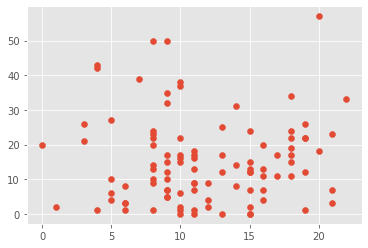

In [9]:
# Plot hours Vs. bikes_available 
# No discrete clusters

plt.scatter(bike_df['hour'],bike_df['bikes_available'])

In [10]:
# Step 1 − First, we need to specify the number of clusters, K, need to be generated by this algorithm.
# a ball park cluster of 24 , since its not straight forward
# create a Kmeans Object 

km = KMeans(n_clusters = 24 )
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=24, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
# Step 2 - Fit and Predict 
# It ran a KMeans algorithm on hour and bikes_available and computed a cluster of 24 , and assigned cluster  numbers

y_predicted = km.fit_predict(bike_df[['hour','bikes_available']])
y_predicted
np.unique(y_predicted)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [12]:
bike_df['cluster'] = y_predicted
bike_df.head()

,station_id,bikes_available,bikes_disabled,docks_available,docks_disabled,date_n_time,week,dom,weekday,hour,cluster
0,3456,11,0,11,0,2020-08-07 16:29:04,32,7,4,16,20
1,3733,7,1,38,0,2020-08-05 16:18:06,32,5,2,16,9
2,3123,24,0,3,0,2020-08-05 08:58:35,32,5,2,8,1
3,3525,17,1,3,0,2020-08-06 10:41:06,32,6,3,10,7
4,3318,9,3,27,0,2020-08-05 08:39:41,32,5,2,8,17


In [13]:
# Visulization the clusters , writing it to seperate dataframes , and plot them into one scatter plot


cluster_1 = bike_df[bike_df.cluster == 0]
cluster_2 = bike_df[bike_df.cluster == 1]
cluster_3 = bike_df[bike_df.cluster == 2]
cluster_4 = bike_df[bike_df.cluster == 3]
cluster_5 = bike_df[bike_df.cluster == 4]
cluster_6 = bike_df[bike_df.cluster == 5]
cluster_7 = bike_df[bike_df.cluster == 6]
cluster_8 = bike_df[bike_df.cluster == 7]
cluster_9 = bike_df[bike_df.cluster == 8]
cluster_10 = bike_df[bike_df.cluster == 9]
cluster_11 = bike_df[bike_df.cluster == 10]
cluster_12 = bike_df[bike_df.cluster == 11]
cluster_13 = bike_df[bike_df.cluster == 12]
cluster_14 = bike_df[bike_df.cluster == 13]
cluster_15 = bike_df[bike_df.cluster == 14]
cluster_16 = bike_df[bike_df.cluster == 15]
cluster_17 = bike_df[bike_df.cluster == 16]
cluster_18 = bike_df[bike_df.cluster == 17]
cluster_19 = bike_df[bike_df.cluster == 18]
cluster_20 = bike_df[bike_df.cluster == 19]
cluster_21 = bike_df[bike_df.cluster == 20]
cluster_22 = bike_df[bike_df.cluster == 21]
cluster_23 = bike_df[bike_df.cluster == 22]
cluster_24 = bike_df[bike_df.cluster == 23]

No handles with labels found to put in legend.


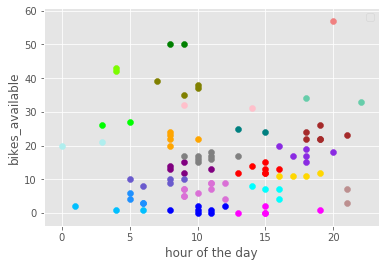

In [14]:
plt.scatter(cluster_1.hour,cluster_1['bikes_available'],color = 'blue')
plt.scatter(cluster_2.hour,cluster_2['bikes_available'],color = 'orange')
plt.scatter(cluster_3.hour,cluster_3['bikes_available'],color = 'green')
plt.scatter(cluster_4.hour,cluster_4['bikes_available'],color = 'red')
plt.scatter(cluster_5.hour,cluster_5['bikes_available'],color = 'purple')
plt.scatter(cluster_6.hour,cluster_6['bikes_available'],color = 'brown')
plt.scatter(cluster_7.hour,cluster_7['bikes_available'],color = 'pink')
plt.scatter(cluster_8.hour,cluster_8['bikes_available'],color = 'gray')
plt.scatter(cluster_9.hour,cluster_9['bikes_available'],color = 'olive')
plt.scatter(cluster_10.hour,cluster_10['bikes_available'],color = 'cyan')
plt.scatter(cluster_11.hour,cluster_11['bikes_available'],color = 'orchid')
plt.scatter(cluster_12.hour,cluster_12['bikes_available'],color = 'deepskyblue')
plt.scatter(cluster_13.hour,cluster_13['bikes_available'],color = 'lawngreen')
plt.scatter(cluster_14.hour,cluster_14['bikes_available'],color = 'lightcoral')
plt.scatter(cluster_15.hour,cluster_15['bikes_available'],color = 'paleturquoise')
plt.scatter(cluster_16.hour,cluster_16['bikes_available'],color = 'blueviolet')
plt.scatter(cluster_17.hour,cluster_17['bikes_available'],color = 'mediumaquamarine')
plt.scatter(cluster_18.hour,cluster_18['bikes_available'],color = 'slateblue')
plt.scatter(cluster_19.hour,cluster_19['bikes_available'],color = 'fuchsia')
plt.scatter(cluster_20.hour,cluster_20['bikes_available'],color = 'teal')
plt.scatter(cluster_21.hour,cluster_21['bikes_available'],color = 'gold')
plt.scatter(cluster_22.hour,cluster_22['bikes_available'],color = 'rosybrown')
plt.scatter(cluster_23.hour,cluster_23['bikes_available'],color = 'dodgerblue')
plt.scatter(cluster_24.hour,cluster_24['bikes_available'],color = 'lime')
plt.xlabel('hour of the day')
plt.ylabel('bikes_available')
plt.legend()


In [15]:
# Since the X-axis is too narrow , we scale our data using the MinMax Scaler

from sklearn.preprocessing import MinMaxScaler



In [16]:

# and now fit our dependent variable and Independent Variable

scaler = MinMaxScaler()
scaler.fit(bike_df[['bikes_available']])
bike_df['bikes_available'] = scaler.transform(bike_df[['bikes_available']])


scaler.fit(bike_df[['hour']])
bike_df['hour'] = scaler.transform(bike_df[['hour']])
bike_df
                   

,station_id,bikes_available,bikes_disabled,docks_available,docks_disabled,date_n_time,week,dom,weekday,hour,cluster
0,3456,0.192982,0,11,0,2020-08-07 16:29:04,32,7,4,0.727273,20
1,3733,0.122807,1,38,0,2020-08-05 16:18:06,32,5,2,0.727273,9
2,3123,0.421053,0,3,0,2020-08-05 08:58:35,32,5,2,0.363636,1
3,3525,0.298246,1,3,0,2020-08-06 10:41:06,32,6,3,0.454545,7
4,3318,0.157895,3,27,0,2020-08-05 08:39:41,32,5,2,0.363636,17
...,...,...,...,...,...,...,...,...,...,...,...
95,262,0.000000,0,24,0,2020-08-07 13:01:49,32,7,4,0.590909,18
96,319,0.017544,1,31,0,2020-08-06 19:12:33,32,6,3,0.863636,18
97,3772,0.122807,0,12,0,2020-08-06 09:06:06,32,6,3,0.409091,10
98,531,0.350877,1,18,0,2020-08-07 00:06:58,32,7,4,0.000000,14


In [17]:
# Step 1 − First, we need to specify the number of clusters, K, need to be generated by this algorithm.
# Fit and Predict 
km = KMeans(n_clusters = 24)
y_predicted = km.fit_predict(bike_df[['hour','bikes_available']])
y_predicted

array([ 3,  3,  4, 12,  0, 18,  3, 18, 18,  5,  9, 10, 18,  1,  0,  1, 19,
        3, 14,  3,  4, 19, 12,  5,  0,  6, 13, 11,  1, 10,  8, 23, 10,  6,
        8, 18, 22, 12,  4, 11, 10, 12, 12,  6,  5,  6, 23, 14, 14, 10, 11,
        3,  8,  1, 11, 15, 16, 23, 18, 20, 16, 13, 20, 20,  6, 11,  0, 14,
       12, 12,  5,  4, 17,  6, 21,  1,  8,  7, 12,  2, 11,  4, 15,  0,  2,
        1, 10,  1, 19, 18,  0,  8, 12, 18, 23,  6, 15, 23,  9,  6])

In [18]:
# add clusters as a Dataframe column
bike_df['cluster'] = y_predicted
bike_df

,station_id,bikes_available,bikes_disabled,docks_available,docks_disabled,date_n_time,week,dom,weekday,hour,cluster
0,3456,0.192982,0,11,0,2020-08-07 16:29:04,32,7,4,0.727273,3
1,3733,0.122807,1,38,0,2020-08-05 16:18:06,32,5,2,0.727273,3
2,3123,0.421053,0,3,0,2020-08-05 08:58:35,32,5,2,0.363636,4
3,3525,0.298246,1,3,0,2020-08-06 10:41:06,32,6,3,0.454545,12
4,3318,0.157895,3,27,0,2020-08-05 08:39:41,32,5,2,0.363636,0
...,...,...,...,...,...,...,...,...,...,...,...
95,262,0.000000,0,24,0,2020-08-07 13:01:49,32,7,4,0.590909,6
96,319,0.017544,1,31,0,2020-08-06 19:12:33,32,6,3,0.863636,15
97,3772,0.122807,0,12,0,2020-08-06 09:06:06,32,6,3,0.409091,23
98,531,0.350877,1,18,0,2020-08-07 00:06:58,32,7,4,0.000000,9


In [19]:
# Step 2 :  Next, randomly select K data points and assign each data point to a cluster. In simple words, classify the data based on the number of data points
# Step 3 − Now it will compute the cluster centroids.


km.cluster_centers_

array([[0.37878788, 0.19883041],
       [0.83116883, 0.27318296],
       [0.38636364, 0.87719298],
       [0.71212121, 0.14035088],
       [0.38181818, 0.38947368],
       [0.65909091, 0.43859649],
       [0.50568182, 0.02192982],
       [0.90909091, 1.        ],
       [0.40909091, 0.63508772],
       [0.06818182, 0.35964912],
       [0.86363636, 0.40643275],
       [0.26515152, 0.0380117 ],
       [0.46464646, 0.28070175],
       [0.18181818, 0.74561404],
       [0.51136364, 0.14912281],
       [0.92424242, 0.06432749],
       [0.18181818, 0.46491228],
       [0.04545455, 0.03508772],
       [0.65909091, 0.23684211],
       [0.68181818, 0.01169591],
       [0.24242424, 0.14035088],
       [1.        , 0.57894737],
       [0.81818182, 0.59649123],
       [0.41818182, 0.10526316]])

In [20]:
cluster_1 = bike_df[bike_df.cluster == 0]
cluster_2 = bike_df[bike_df.cluster == 1]
cluster_3 = bike_df[bike_df.cluster == 2]
cluster_4 = bike_df[bike_df.cluster == 3]
cluster_5 = bike_df[bike_df.cluster == 4]
cluster_6 = bike_df[bike_df.cluster == 5]
cluster_7 = bike_df[bike_df.cluster == 6]
cluster_8 = bike_df[bike_df.cluster == 7]
cluster_9 = bike_df[bike_df.cluster == 8]
cluster_10 = bike_df[bike_df.cluster == 9]
cluster_11 = bike_df[bike_df.cluster == 10]
cluster_12 = bike_df[bike_df.cluster == 11]
cluster_13 = bike_df[bike_df.cluster == 12]
cluster_14 = bike_df[bike_df.cluster == 13]
cluster_15 = bike_df[bike_df.cluster == 14]
cluster_16 = bike_df[bike_df.cluster == 15]
cluster_17 = bike_df[bike_df.cluster == 16]
cluster_18 = bike_df[bike_df.cluster == 17]
cluster_19 = bike_df[bike_df.cluster == 18]
cluster_20 = bike_df[bike_df.cluster == 19]
cluster_21 = bike_df[bike_df.cluster == 20]
cluster_22 = bike_df[bike_df.cluster == 21]
cluster_23 = bike_df[bike_df.cluster == 22]
cluster_24 = bike_df[bike_df.cluster == 23]


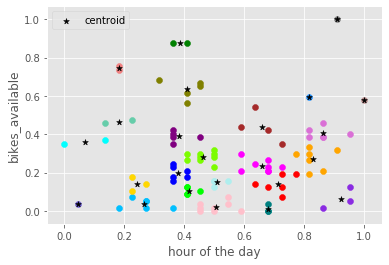

In [21]:
plt.scatter(cluster_1.hour,cluster_1['bikes_available'],color = 'blue')
plt.scatter(cluster_2.hour,cluster_2['bikes_available'],color = 'orange')
plt.scatter(cluster_3.hour,cluster_3['bikes_available'],color = 'green')
plt.scatter(cluster_4.hour,cluster_4['bikes_available'],color = 'red')
plt.scatter(cluster_5.hour,cluster_5['bikes_available'],color = 'purple')
plt.scatter(cluster_6.hour,cluster_6['bikes_available'],color = 'brown')
plt.scatter(cluster_7.hour,cluster_7['bikes_available'],color = 'pink')
plt.scatter(cluster_8.hour,cluster_8['bikes_available'],color = 'gray')
plt.scatter(cluster_9.hour,cluster_9['bikes_available'],color = 'olive')
plt.scatter(cluster_10.hour,cluster_10['bikes_available'],color = 'cyan')
plt.scatter(cluster_11.hour,cluster_11['bikes_available'],color = 'orchid')
plt.scatter(cluster_12.hour,cluster_12['bikes_available'],color = 'deepskyblue')
plt.scatter(cluster_13.hour,cluster_13['bikes_available'],color = 'lawngreen')
plt.scatter(cluster_14.hour,cluster_14['bikes_available'],color = 'lightcoral')
plt.scatter(cluster_15.hour,cluster_15['bikes_available'],color = 'paleturquoise')
plt.scatter(cluster_16.hour,cluster_16['bikes_available'],color = 'blueviolet')
plt.scatter(cluster_17.hour,cluster_17['bikes_available'],color = 'mediumaquamarine')
plt.scatter(cluster_18.hour,cluster_18['bikes_available'],color = 'slateblue')
plt.scatter(cluster_19.hour,cluster_19['bikes_available'],color = 'fuchsia')
plt.scatter(cluster_20.hour,cluster_20['bikes_available'],color = 'teal')
plt.scatter(cluster_21.hour,cluster_21['bikes_available'],color = 'gold')
plt.scatter(cluster_22.hour,cluster_22['bikes_available'],color = 'rosybrown')
plt.scatter(cluster_23.hour,cluster_23['bikes_available'],color = 'dodgerblue')
plt.scatter(cluster_24.hour,cluster_24['bikes_available'],color = 'lime')
plt.xlabel('hour of the day')
plt.ylabel('bikes_available')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black',marker = '*',label = 'centroid')
plt.legend()

 Next, keep iterating the following until we find optimal centroid which is the assignment of data points to the clusters that are not changing any more

 First, the sum of squared distance between data points and centroids would be computed.

 Now, we have to assign each data point to the cluster that is closer than other cluster (centroid).

 At last compute the centroids for the clusters by taking the average of all data points of that cluster.

In [22]:
k_range = range (1,24)
SSE = []

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(bike_df[['hour','bikes_available']])
    SSE.append(km.inertia_)

In [23]:
# check SSE
SSE

[9.786744192109966,
 6.0875004895349685,
 3.687836884534559,
 2.850207035495599,
 2.3136587099552424,
 1.9225798271850283,
 1.5922821388327613,
 1.2839664617953592,
 1.1375520551433658,
 1.0012647833905128,
 0.9098603756558588,
 0.7968080169330902,
 0.7189796764174544,
 0.6210446393434514,
 0.5603761830651572,
 0.49575132139872335,
 0.45420080179171657,
 0.4024601798011098,
 0.37443529456404046,
 0.3379921584162749,
 0.3141882931107174,
 0.28962276185687585,
 0.2798982596467487]

When we plot the graph of ‘value of k’ on x-axis and ‘value of SSE ’ on y-axis, there is an elbow formation at the optimum value of ‘k’.

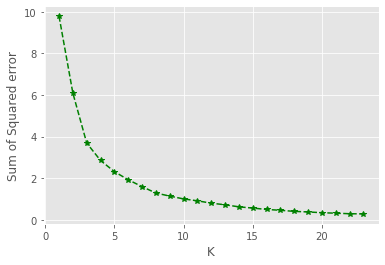

In [24]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')

plt.plot(k_range,SSE, linestyle='--', marker='*', color='green')

From the above graph we observe that there is an elbow formation at k = 5. Hence the optimum value of k is 5. Therefore we cluster the data set into 5 clusters.